In [83]:
#import libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
# load dataset
df=pd.read_excel('Customer-Churn.xlsx')

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#Explore the Data

len(df.columns)


21

In [87]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

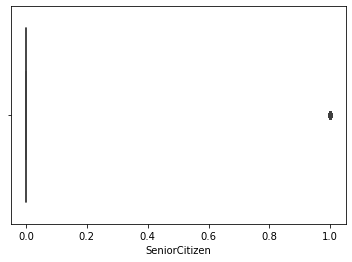

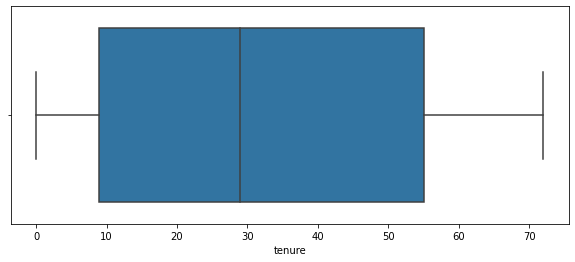

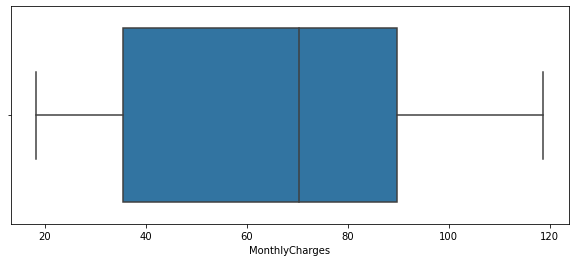

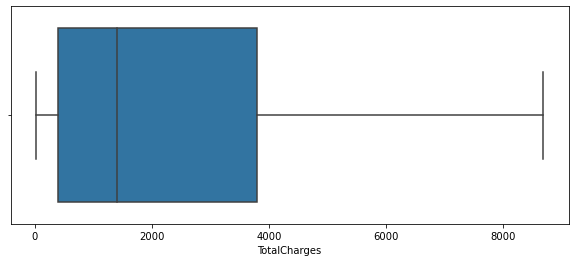

<Figure size 720x288 with 0 Axes>

In [90]:
for i in df.select_dtypes(include= "number").columns:
    sns.boxplot(data = df , x = i)
    plt.show()
    plt.figure( figsize = (10,4))

In [91]:
# drop unnecessory features
df = df.drop(['customerID', 'MultipleLines','InternetService','Contract','OnlineSecurity','PaperlessBilling', 'PaymentMethod'], axis = 1)


In [92]:
len(df.columns)

14

In [93]:
# Calculate the mean of the 'TotalCharges' column
mean_total_charges = df['TotalCharges'].mean()

# Fill the missing values with the mean
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [98]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the encoded DataFrame
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0            0.0        1           0     1.0             0   
1       1            0.0        0           0    34.0             1   
2       1            0.0        0           0     2.0             1   
3       1            0.0        0           0    45.0             0   
4       0            0.0        0           0     2.0             1   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             2                 0            0            0                0   
1             0                 2            0            0                0   
2             2                 0            0            0                0   
3             0                 2            2            0                0   
4             0                 0            0            0                0   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1         

In [100]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,2,0,0,0,0,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,2,0,0,0,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,2,0,0,0,0,53.85,108.15,1
3,1,0.0,0,0,45.0,0,0,2,2,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,0,0,0,0,70.70,151.65,1


In [101]:
# split data
X=df.drop(['Churn'] , axis =1)
y= df['Churn']

In [102]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1.0,0,2,0,0,0,0,29.85,29.85
1,1,0.0,0,0,34.0,1,0,2,0,0,0,56.95,1889.50
2,1,0.0,0,0,2.0,1,2,0,0,0,0,53.85,108.15
3,1,0.0,0,0,45.0,0,0,2,2,0,0,42.30,1840.75
4,0,0.0,0,0,2.0,1,0,0,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,0,2,2,2,2,84.80,1990.50
7039,0,0.0,1,1,72.0,1,2,2,0,2,2,103.20,7362.90
7040,0,0.0,1,1,11.0,0,0,0,0,0,0,29.60,346.45
7041,1,1.0,1,0,4.0,1,0,0,0,0,0,74.40,306.60


In [103]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [104]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

In [105]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [106]:
y_pred=model.predict(X)

In [107]:
y_pred[:6]

array([0, 0, 0, 0, 1, 1])

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.79


In [109]:
# Create the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4667  507]
 [ 955  914]]


In [110]:
#Using Precision score
from sklearn.metrics import precision_score
pres_score=precision_score(y,y_pred)
print(pres_score)

0.6432090077410274
